# Классификация токсичных комментариев для "Викишоп" 😾

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Надо обучить модель классифицировать комментарии на позитивные и негативные. В нашем распоряжении набор данных с разметкой о токсичности текстов.

**Техническое задание**
- Построить модель со значением метрики качества <tt>F1</tt> не меньше <tt>0.75</tt>

<h1>Содержание проекта<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных-🧐" data-toc-modified-id="Обзор-данных-🧐-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных 🧐</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Получение-данных" data-toc-modified-id="Получение-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Получение данных</a></span></li><li><span><a href="#Разведочный-анализ-данных" data-toc-modified-id="Разведочный-анализ-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Разведочный анализ данных</a></span></li><li><span><a href="#Итого" data-toc-modified-id="Итого-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Итого</a></span></li></ul></li><li><span><a href="#Предобработка-данных-⚙️" data-toc-modified-id="Предобработка-данных-⚙️-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных ⚙️</a></span><ul class="toc-item"><li><span><a href="#Токенизация,-лемматизация,-очистка-текста" data-toc-modified-id="Токенизация,-лемматизация,-очистка-текста-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Токенизация, лемматизация, очистка текста</a></span></li><li><span><a href="#Разделение-данных-на-выборки" data-toc-modified-id="Разделение-данных-на-выборки-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Разделение данных на выборки</a></span></li><li><span><a href="#Итого" data-toc-modified-id="Итого-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Итого</a></span></li></ul></li><li><span><a href="#Балансировка-классов-⚖️" data-toc-modified-id="Балансировка-классов-⚖️-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Балансировка классов ⚖️</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Без-учета-дисбаланса-классов" data-toc-modified-id="Без-учета-дисбаланса-классов-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Без учета дисбаланса классов</a></span></li><li><span><a href="#class_weight='balanced'" data-toc-modified-id="class_weight='balanced'-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span><tt>class_weight='balanced'</tt></a></span></li></ul></li><li><span><a href="#RandomUnderSampler" data-toc-modified-id="RandomUnderSampler-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>RandomUnderSampler</a></span></li><li><span><a href="#RandomOverSampler" data-toc-modified-id="RandomOverSampler-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>RandomOverSampler</a></span></li><li><span><a href="#Итого" data-toc-modified-id="Итого-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Итого</a></span></li></ul></li><li><span><a href="#Обучение-моделей-🦾" data-toc-modified-id="Обучение-моделей-🦾-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение моделей 🦾</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#GradientBoostingClassifier" data-toc-modified-id="GradientBoostingClassifier-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>GradientBoostingClassifier</a></span></li><li><span><a href="#Результаты-обучения-моделей" data-toc-modified-id="Результаты-обучения-моделей-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Результаты обучения моделей</a></span></li><li><span><a href="#Итого" data-toc-modified-id="Итого-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Итого</a></span></li></ul></li><li><span><a href="#Тестирование-модели-💯" data-toc-modified-id="Тестирование-модели-💯-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели 💯</a></span><ul class="toc-item"><li><span><a href="#Test-F1" data-toc-modified-id="Test-F1-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Test F1</a></span></li><li><span><a href="#AUC-ROC,-ROC-кривая" data-toc-modified-id="AUC-ROC,-ROC-кривая-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>AUC-ROC, ROC-кривая</a></span></li><li><span><a href="#Проверка-на-адекватность" data-toc-modified-id="Проверка-на-адекватность-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Проверка на адекватность</a></span></li><li><span><a href="#Итого" data-toc-modified-id="Итого-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Итого</a></span></li></ul></li><li><span><a href="#Общий-вывод-👀" data-toc-modified-id="Общий-вывод-👀-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод 👀</a></span><ul class="toc-item"><li><span><a href="#Краткая-сводка-по-выполненным-задачам" data-toc-modified-id="Краткая-сводка-по-выполненным-задачам-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Краткая сводка по выполненным задачам</a></span><ul class="toc-item"><li><span><a href="#Шаг-1.-Обзор-данных" data-toc-modified-id="Шаг-1.-Обзор-данных-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Шаг 1. Обзор данных</a></span></li><li><span><a href="#Шаг-2.-Предобработка-данных" data-toc-modified-id="Шаг-2.-Предобработка-данных-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Шаг 2. Предобработка данных</a></span></li><li><span><a href="#Шаг-3.-Балансировка-классов" data-toc-modified-id="Шаг-3.-Балансировка-классов-6.1.3"><span class="toc-item-num">6.1.3&nbsp;&nbsp;</span>Шаг 3. Балансировка классов</a></span></li><li><span><a href="#Шаг-4.-Обучение-моделей" data-toc-modified-id="Шаг-4.-Обучение-моделей-6.1.4"><span class="toc-item-num">6.1.4&nbsp;&nbsp;</span>Шаг 4. Обучение моделей</a></span></li><li><span><a href="#Шаг-5.-Тестирование-модели" data-toc-modified-id="Шаг-5.-Тестирование-модели-6.1.5"><span class="toc-item-num">6.1.5&nbsp;&nbsp;</span>Шаг 5. Тестирование модели</a></span></li></ul></li></ul></li></ul></div>

## Обзор данных 🧐

### Импорт библиотек

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

from nltk.corpus import stopwords
from pywsd.utils import lemmatize_sentence
from pandarallel import pandarallel

from sklearn.model_selection import train_test_split, cross_val_score, \
                                    GridSearchCV, KFold, StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, roc_curve, roc_auc_score, make_scorer
from sklearn.utils.class_weight import compute_class_weight
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import shuffle
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline, make_pipeline
from mlxtend.feature_selection import ColumnSelector

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.dummy import DummyClassifier

import sys
from tqdm.auto import tqdm
from typing import *
from time import time
import urllib
import warnings
from IPython.display import HTML, display

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

sys.setrecursionlimit(5000)

%matplotlib inline

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:10,.2f}'.format

pandarallel.initialize(progress_bar=True)

np.set_printoptions(suppress=True)

warnings.filterwarnings('ignore')

STATE = 42

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gennadiy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/gennadiy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/gennadiy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/gennadiy/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/gennadiy/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Warming up PyWSD (takes ~10 secs)... took 6.6371378898620605 secs.


INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


### Получение данных

In [3]:
label = 'toxic_comments.csv'

pd_params = {}

try:
    data = pd.read_csv(
        f'https://code.s3.yandex.net/datasets/{label}', **pd_params)
    data.columns.name = label
    display(data.head(10))
    print('✅ Данные загружены с внешнего ресурса и успешно прочитаны')
except urllib.request.URLError:
    # Если отстутствует доступ к внешнему ресурсу с данными
    while True:
        data_name = input(
            'Укажите имя файла с данными в каталоге с проектом. '
            'Например: "data.csv".\n'
            'Если данные находятся не в каталоге с проектом нажмите Enter.\n\n'
        )
        if not data_name:
            while True:
                data_path = input('Введите абсолютный путь к датасету:\n')
                try:
                    data = pd.read_csv(data_path, **pd_params)
                    data.columns.name = data_path.split('/')[-1]
                    display(data.head(10))
                    print('✅ Исходные данные успешно прочитаны по указанному пути')

                    break

                except FileNotFoundError:  # Путь, указанный пользователем, неверный
                    raise Exception(
                        f'❌Указан неверный путь к файлу: {data_path}')
        else:
            data = pd.read_csv(data_name, **pd_params)
            data.columns.name = data_name
            display(data.head(10))
            print('✅ Исходные данные успешно прочитаны из каталога с проектом')
            break
        break

toxic_comments.csv,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0
5,5,"""\n\nCongratulations from me as well, use the ...",0
6,6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
7,7,Your vandalism to the Matt Shirvington article...,0
8,8,Sorry if the word 'nonsense' was offensive to ...,0
9,9,alignment on this subject and which are contra...,0


✅ Данные загружены с внешнего ресурса и успешно прочитаны


### Разведочный анализ данных

В первую очередь посмотрим общую информацию о данных

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


Почти **160 тыс. комментариев**!

Пропущенных значений нет и хорошо, но стоит сразу отбросить столбец <tt>Unnamed: 0</tt>, который, вероятно, остался из-за выгрузки данных

In [5]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.columns

Index(['text', 'toxic'], dtype='object', name='toxic_comments.csv')

Рассмотрим соотношение классов

In [6]:
data.toxic.value_counts()

0    143106
1     16186
Name: toxic, dtype: int64

Объекты класса <tt>0</tt> преобладают почти <b>в 9 раз</b>! Нехорошо. 

Потребуется перебалансировка классов. Метод перебалансировки выберем позднее.

Теперь убедимся в том, что данные размечены верно. Выберем <tt>25</tt> случайных объектов из данных с классом <tt>1</tt>

In [7]:
data.sample(25, weights='toxic', random_state=STATE)

toxic_comments.csv,text,toxic
59030,See you \n\nLousy cunt,1
151461,You son of a bitch \nI was the one who recogni...,1
116559,You enjoy taking dick in the ass D,1
95116,racist reetards \n\nim sick of you racist reee...,1
24503,How about leaving the dishonourable epithet up...,1
24494,Donner the biTCH \n\nExcuse me but I spent hou...,1
8961,"""\n\nIf you don't believe me, go look at the s...",1
137686,Also he is a.w.f.u.l.,1
95483,What are you talking about? I actually gave hi...,1
112687,I saw her for the first time on the Daily Show...,1


Агрессивненько)) Но вроде все размечено верно.

Напоследок убедимся в отсутствии явных дубликатов

In [8]:
data.duplicated().sum()

0

<div style="border: 3px solid rgb(0,0,0); padding: 20px">
    
### Итого
    
- Всего чуть менее 160 тыс. объектов;
- Требуется лемматизация, исключение стоп слов/символов и токенизация данных;
- Присутствует сильный дисбаланс классов;
- Данные размечены верно;
- Явные дубликаты отсутствуют

## Предобработка данных ⚙️

Прежде, чем мы приступим к решению задач NLP, нужно предварительно обработать и очистить данные.

Если коротко, то мы:
- **Токенизируем** — переводим предложения в список токенов или слов;
- **Лемматизируем** — приводим слова к их нормальной форме или корню («studies», «studing» → «study»);
- **Исключаем лишние символы** - используем регулярные выржаения для удаление спец. символов;
- **Избавляемся от стоп-слов** — выкидываем слова вроде «a» или «the»;
- **Векторизируем корпус слов** - создаем векторизированный корпус из слов. 

    <tt>P.S: последний этап будет проводится в ходе обучения моделей, так как будет использоваться Pipeline</tt>

### Токенизация, лемматизация, очистка текста

In [9]:
def clear_text(text):
    return " ".join(re.sub(r'[^a-zA-Z]', ' ', ' '.join(text)).split())

In [10]:
# data['lemm_text'] = (data['text']
#                      .parallel_apply(lemmatize_sentence)
#                      .parallel_apply(clear_text))

---

Лемматизированный и очищенный датасет был загружен в раздел <tt>Extra</tt> в данном репозитории, чтобы ускорить выполнение данного проекта при последующих перезапусках

In [3]:
data = pd.read_csv(
    'https://github.com/gndvrn/yandex-practicum/raw/main/Extra/toxic_comments_lemmatized.csv.xz')
data.dropna(inplace=True) # 11 NaN вследствие конвертации (там были пустые строки, стали NaN)
data = data.reset_index(drop=True)
data.head()

,text,toxic,lemm_text
0,Explanation\nWhy the edits made under my usern...,0,explanation why the edits make under my userna...
1,D'aww! He matches this background colour I'm s...,0,d aww he match this background colour i m seem...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man i m really not try to edit war it s ju...
3,"""\nMore\nI can't make any real suggestions on ...",0,more i ca n t make any real suggestion on impr...
4,"You, sir, are my hero. Any chance you remember...",0,you sir be my hero any chance you remember wha...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159281 entries, 0 to 159280
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   text       159281 non-null  object
 1   toxic      159281 non-null  int64 
 2   lemm_text  159281 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.6+ MB


---

### Разделение данных на выборки

In [13]:
X = data.drop(columns=['text', 'toxic'])
y = data['toxic']

In [14]:
def data_sampling(X: pd.DataFrame, y: pd.Series, ratios: list = [0.75, 0.25], tts_props: Dict = {}) -> Tuple:
    if len(ratios) == 2:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=ratios[1], **tts_props)

        print(f'✅ Данные успешно разделены на train и test в '
              f'соотношении {ratios[0]}:{ratios[1]}')

        return X_train, X_test, y_train, y_test
    elif len(ratios) == 3:
        X_train, X_valid_test, y_train, y_valid_test = train_test_split(
            X, y, test_size=1-ratios[0], **tts_props)
        X_valid, X_test, y_valid, y_test = train_test_split(
            X_valid_test, y_valid_test, test_size=ratios[2]/(ratios[1]+ratios[2]), **tts_props)

        print(f'✅ Данные успешно разделены на train, valid и test в ' 
              f'соотношении {ratios[0]}:{ratios[1]}:{ratios[2]}')

        return X_train, X_valid, X_test, y_train, y_valid, y_test
    else:
        raise Exception(f'Введены неверные размеры выборок')

In [15]:
X_train, X_test, y_train, y_test = data_sampling(
    X, y, ratios=[0.9, 0.1], tts_props={'random_state' : STATE})

display(X_train.head(), X_train.shape)
display(y_train.head(), y_train.shape)
display(X_test.head(), X_test.shape)
display(y_test.head(), X_test.shape)

✅ Данные успешно разделены на train и test в соотношении 0.9:0.1


,lemm_text
69194,i write that shit age ago what be you a slake ...
27576,article about sizzla you can use babylon have ...
107104,shuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuut up my aw...
141414,what a blatent cheek ok to begin the first ord...
157239,raccoon dog hi not sure if i be suppose to com...


(143352, 1)

69194     1
27576     0
107104    1
141414    0
157239    0
Name: toxic, dtype: int64

(143352,)

,lemm_text
89052,message re your last change go fuck your self ...
127199,dashboard date range sage when the dashboard p...
1045,you go away you loser way to standup for you b...
80668,utc the current publish orbital period of nept...
37563,mar utc


(15929, 1)

89052     1
127199    0
1045      1
80668     0
37563     0
Name: toxic, dtype: int64

(15929, 1)

<div style="border: 3px solid rgb(0,0,0); padding: 20px">
    
### Итого
    
- Произведена токенизация (разделение комментрариев на слова);
- Выполнена лемматизация токенов;
- Убраны спец. символы;
- Сформирована тренировочная тестовая выборки. Соотношение 90:10;
- Исключены стоп-слова и векторизировали корпуса.

## Балансировка классов ⚖️

Чтобы модель показывала стабильно хорошие результаты нужно ее обучить на наборе данных, где равное количество положительных и отрицательных комментариев. Есть несколько способов устранения (или "неустранения") ) данной проблемы:

- Ничего не использовать;
- Использовать автобалансировку;
- Использовать <tt>downsampling</tt>/<tt>upsampling</tt>

---

<center>Метрика качества ⟶ <i><tt>F1</tt></i></center>

Выбор ее обусловен тем, что она полноценнее характеризует качество модели, чем более распространенная <tt>Accuracy</tt>. Это происходит за счет того, что при ее расчете используются значения <tt>Precision</tt> и <tt>Recall</tt>:

$$F1 = \frac {2 * Precision * Recall} {Precision + Recall}$$

In [16]:
CROSS_VAL = StratifiedKFold(n_splits=3)
SCORING = 'f1'
STOPWORDS = list(set(stopwords.words('english')))

### Logistic Regression

Поэкспериментируем с логистической регрессией.

Обучим ее без учета дисбаланса классов, с параметрами учета дисбаланса и с применением <tt>downsampling</tt>.

#### Без учета дисбаланса классов

In [17]:
lr1_pipeline = make_pipeline(
    ColumnSelector(cols=('lemm_text'), drop_axis=True),
    TfidfVectorizer(stop_words=STOPWORDS), 
    LogisticRegression())

lr1_f1_cv = round(
    cross_val_score(lr1_pipeline, 
                    X_train, 
                    y_train, 
                    cv=KFold(2, shuffle=True, random_state=STATE), 
                    scoring=SCORING).mean(), 2)

print(f'LogisticRegression.\n'
      f'Cross validation F1 ⟶ {lr1_f1_cv}')

LogisticRegression.
Cross validation F1 ⟶ 0.71


#### <tt>class_weight='balanced'</tt>

In [18]:
lr2_pipeline = make_pipeline(
    ColumnSelector(cols=('lemm_text'), drop_axis=True),
    TfidfVectorizer(stop_words=STOPWORDS),  
    LogisticRegression(class_weight='balanced'))

lr2_f1_cv = round(
    cross_val_score(lr2_pipeline, 
                    X_train, 
                    y_train, 
                    cv=CROSS_VAL, 
                    scoring=SCORING).mean(), 2)

print(f'LogisticRegression(class_weight=\'balanced\').\n'
      f'Cross validation F1 ⟶ {lr2_f1_cv}')

LogisticRegression(class_weight='balanced').
Cross validation F1 ⟶ 0.74


### RandomUnderSampler

In [19]:
lr3_pipeline = make_pipeline(
    ColumnSelector(cols=('lemm_text'), drop_axis=True),
    TfidfVectorizer(stop_words=STOPWORDS), 
    RandomUnderSampler(), 
    LogisticRegression())

lr3_f1_cv = round(cross_val_score(lr3_pipeline, 
                                  X_train, 
                                  y_train, 
                                  cv=CROSS_VAL, 
                                  scoring=SCORING).mean(), 2)

print(f'LogisticRegression() + RandomUnderSampler().\n'
      f'Cross validation F1 ⟶ {lr3_f1_cv}')

LogisticRegression() + RandomUnderSampler().
Cross validation F1 ⟶ 0.69


### RandomOverSampler

In [20]:
lr4_pipeline = make_pipeline(
    ColumnSelector(cols=('lemm_text'), drop_axis=True),
    TfidfVectorizer(stop_words=STOPWORDS), 
    RandomOverSampler(), 
    LogisticRegression())

lr4_f1_cv = round(cross_val_score(lr3_pipeline, 
                                  X_train, 
                                  y_train, 
                                  cv=CROSS_VAL, 
                                  scoring=SCORING).mean(), 2)

print(f'LogisticRegression() + RandomOverSampler().\n'
      f'Cross validation F1 ⟶ {lr4_f1_cv}')

LogisticRegression() + RandomOverSampler().
Cross validation F1 ⟶ 0.69


Cамый лучший результат на валидационной выборке показывает модель с автоматической балансировкой классов.

Соберем результаты в таблицу

In [21]:
lr_balancing_results = pd.DataFrame(
    {
        'Модель' : [
            'LogisticRegression', 
            'LogisticRegression(class_weight=\'balanced\')', 
            'LogisticRegression + RandomUnderSampler()', 
            'LogisticRegression + RandomOverSampler()'],
        
        'F1-мера на кросс-валидации' : [
            lr1_f1_cv, 
            lr2_f1_cv, 
            lr3_f1_cv, 
            lr4_f1_cv]
    }
)

lr_balancing_results = lr_balancing_results.sort_values(
    by='F1-мера на кросс-валидации', ascending=False)

lr_balancing_results

,Модель,F1-мера на кросс-валидации
1,LogisticRegression(class_weight='balanced'),0.74
0,LogisticRegression,0.71
2,LogisticRegression + RandomUnderSampler(),0.69
3,LogisticRegression + RandomOverSampler(),0.69


<div style="border: 3px solid rgb(0,0,0); padding: 20px">
    
### Итого

Лучший способ избавления от дисбаланса классов при обучении моделей - <tt>автобалансировка</tt>. Далее будем применять его, чтобы улучшить показатели качества предсказаний моделей.

## Обучение моделей 🦾

В роли кандидатов на роль модели для проверки на тестовом наборе будем рассматривать:

- <tt>LogisticRegression</tt> (результаты для модели без гиперпараметров у нас уже есть. Подберем гиперпараметры);
- <tt>RandomForestClassifier</tt>;
- <tt>GradientBoostingClassifier</tt>;

In [22]:
def init_GS(model,
            params_grid,
            train_features,
            train_target,
            scorer=SCORING,
            cv=CROSS_VAL,
            refit=True,
            verbose=3,
            n_jobs=-1):

    GS = GridSearchCV(model,
                      params_grid,
                      cv=cv,
                      refit=refit,
                      scoring=scorer,
                      verbose=verbose,
                      n_jobs=n_jobs).fit(train_features, train_target)
    return GS

### LogisticRegression

In [23]:
lr_pipeline = make_pipeline(
    ColumnSelector(cols=('lemm_text'), drop_axis=True),
    TfidfVectorizer(stop_words=STOPWORDS),
    LogisticRegression(max_iter=150, solver='liblinear', class_weight='balanced', verbose=2))

lr_params = {'logisticregression__C': [5, 10],
             'logisticregression__penalty': ['l2'],
             'logisticregression__tol': [1e-5, 1e-6]}

lr_gs = init_GS(lr_pipeline, lr_params, X_train, y_train)

lr = lr_gs.best_estimator_
lr_f1_cv = round(lr_gs.best_score_, 2)

print(f'Best estimator : {str(lr)}\n'
      f'Cross validation F1 ⟶ {lr_f1_cv}\n')

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[LibLinear]iter  1 act 1.859e+05 pre 1.597e+05 delta 7.827e+01 f 3.312e+05 |g| 1.233e+04 CG   9
cg reaches trust region boundary
iter  2 act 5.436e+04 pre 4.426e+04 delta 1.029e+02 f 1.453e+05 |g| 5.460e+03 CG  10
iter  3 act 1.768e+04 pre 1.455e+04 delta 1.029e+02 f 9.094e+04 |g| 1.722e+03 CG  11
iter  4 act 4.738e+03 pre 3.862e+03 delta 1.029e+02 f 7.326e+04 |g| 8.266e+02 CG   9
iter  5 act 1.161e+03 pre 9.499e+02 delta 1.029e+02 f 6.852e+04 |g| 8.336e+02 CG   4
iter  6 act 7.100e+02 pre 6.351e+02 delta 1.029e+02 f 6.736e+04 |g| 4.494e+02 CG   8
iter  7 act 1.475e+02 pre 1.433e+02 delta 1.029e+02 f 6.665e+04 |g| 1.014e+02 CG  12
iter  8 act 3.985e+00 pre 3.932e+00 delta 1.029e+02 f 6.650e+04 |g| 2.250e+01 CG   9
iter  9 act 3.633e-01 pre 3.633e-01 delta 1.029e+02 f 6.650e+04 |g| 2.532e+00 CG  15
iter 10 act 1.957e-03 pre 1.957e-03 delta 1.029e+02 f 6.650e+04 |g| 1.889e-01 CG  16
[CV 1/3] END logisticregression__C=5, logistic

### RandomForestClassifier

In [24]:
rfc_pipeline = make_pipeline(
    ColumnSelector(cols=('lemm_text'), drop_axis=True),
    TfidfVectorizer(stop_words=STOPWORDS), 
    RandomForestClassifier(class_weight='balanced', n_estimators=150, verbose=2, n_jobs=-1))

rfc_f1_cv = round(
    cross_val_score(rfc_pipeline, 
                    X_train, 
                    y_train, 
                    cv=CROSS_VAL, 
                    scoring=SCORING).mean(), 2)

print(f'RandomForestClassifier(class_weight=\'balanced\', n_estimators=150)\n'
      f'Cross validation F1 ⟶ {rfc_f1_cv}\n')

building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150


[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:  3.5min


building tree 41 of 150
building tree 42 of 150
building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69 of 150
building tree 70 of 150
building tree 71 of 150
building tree 72 of 150
building tree 73 of 150
building tree 74 of 150
building tree 75 of 150
building tree 76 of 150
building tree 77 of 150
building tree 78 of 150
building tree 79 of 150
building tree 80 of 150
building tree 81 of 150
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    2.5s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150


[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:  3.7min


building tree 41 of 150
building tree 42 of 150
building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69 of 150
building tree 70 of 150
building tree 71 of 150
building tree 72 of 150
building tree 73 of 150
building tree 74 of 150
building tree 75 of 150
building tree 76 of 150
building tree 77 of 150
building tree 78 of 150
building tree 79 of 150
building tree 80 of 150
building tree 81 of 150
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    2.2s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150


[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:  3.7min


building tree 41 of 150
building tree 42 of 150
building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69 of 150
building tree 70 of 150
building tree 71 of 150
building tree 72 of 150
building tree 73 of 150
building tree 74 of 150
building tree 75 of 150
building tree 76 of 150
building tree 77 of 150
building tree 78 of 150
building tree 79 of 150
building tree 80 of 150
building tree 81 of 150
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    2.3s


RandomForestClassifier(class_weight='balanced', n_estimators=150)
Cross validation F1 ⟶ 0.61



### GradientBoostingClassifier

In [25]:
gbc_pipeline = make_pipeline(
    ColumnSelector(cols=('lemm_text'), drop_axis=True),
    TfidfVectorizer(stop_words=STOPWORDS), 
    GradientBoostingClassifier(n_estimators=150, learning_rate=0.3, verbose=1))

gbc_f1_cv = round(
    cross_val_score(gbc_pipeline, 
                    X_train, 
                    y_train, 
                    cv=CROSS_VAL, 
                    scoring=SCORING).mean(), 2)

print(f'GradientBoostingClassifier(n_estimators=150, learning_rate=0.3)\n'
      f'Cross validation F1 ⟶ {gbc_f1_cv}\n')

      Iter       Train Loss   Remaining Time 
         1           0.5449            3.83m
         2           0.5162            3.61m
         3           0.4941            3.53m
         4           0.4795            3.47m
         5           0.4679            3.43m
         6           0.4564            3.39m
         7           0.4481            3.36m
         8           0.4406            3.32m
         9           0.4338            3.30m
        10           0.4288            3.27m
        20           0.3854            3.00m
        30           0.3589            2.76m
        40           0.3401            2.54m
        50           0.3256            2.32m
        60           0.3136            2.09m
        70           0.3031            1.85m
        80           0.2944            1.62m
        90           0.2856            1.39m
       100           0.2783            1.16m
      Iter       Train Loss   Remaining Time 
         1           0.5457            3.60m
        

### Результаты обучения моделей

In [26]:
models_results = pd.DataFrame(
    {
        'Модель': [
            str(lr), 
            'RandomForestClassifier(class_weight=\'balanced\', n_estimators=150)', 
            'GradientBoostingClassifier(n_estimators=150, learning_rate=0.3)'],
        
        'F1-мера на кросс-валидации': [
            lr_f1_cv, 
            rfc_f1_cv, 
            gbc_f1_cv]
    }
)

models_results = models_results.sort_values(by='F1-мера на кросс-валидации', ascending=False)
models_results

,Модель,F1-мера на кросс-валидации
0,"Pipeline(steps=[('columnselector',\n ...",0.75
2,"GradientBoostingClassifier(n_estimators=150, l...",0.72
1,RandomForestClassifier(class_weight='balanced'...,0.61


<div style="border: 3px solid rgb(0,0,0); padding: 20px">
    
### Итого
    
Выбрали модель <tt>LogisticRegression(C=5, class_weight='balanced', max_iter=150,
                                    solver='liblinear', tol=1e-05)</tt>. 
    
Значение <tt>F1-меры</tt> на кросс-валидации у данной модели равно <tt>0.76</tt>

## Тестирование модели 💯

### Test F1

In [27]:
lr_test_preds = lr.predict(X_test)
lr_f1_test = round(f1_score(y_test, lr_test_preds), 5)

print(f'Model : {str(lr)}\n'
      f'Test F1 ⟶ {lr_f1_test}')

Model : Pipeline(steps=[('columnselector',
                 ColumnSelector(cols='lemm_text', drop_axis=True)),
                ('tfidfvectorizer',
                 TfidfVectorizer(stop_words=['why', 'between', 'how', 'only',
                                             "hasn't", 'in', 'for', 'don',
                                             'his', 'myself', 'itself', 'm',
                                             'she', 'mightn', 'themselves',
                                             'about', 'yourselves', 'other',
                                             'we', 'couldn', "she's", 'didn',
                                             'ours', 'll', 'now', 'do', 'can',
                                             "didn't", "won't", "that'll", ...])),
                ('logisticregression',
                 LogisticRegression(C=5, class_weight='balanced', max_iter=150,
                                    solver='liblinear', tol=1e-05,
                                    verbose=

Конечное значение <tt>F1-меры</tt> удовлетворяет ТЗ. Модель можно использовать.

Посмотрим на значение AUC-ROC и построим ROC-кривую:

### AUC-ROC, ROC-кривая

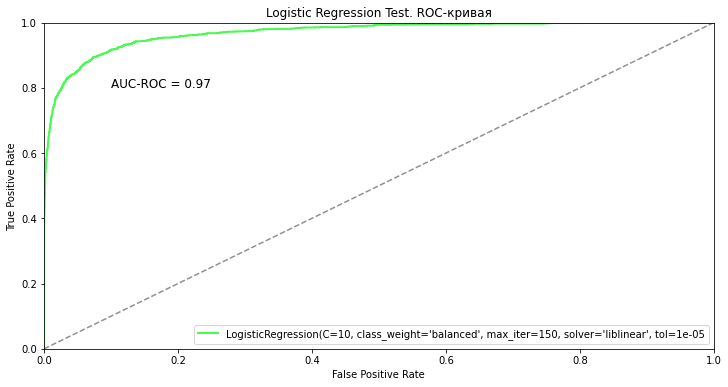

In [28]:
test_one_probs = lr.predict_proba(X_test)[:, 1]
fper_test, tper_test, thresholds_test = roc_curve(y_test, test_one_probs)
model_roc_auc = roc_auc_score(y_test, test_one_probs)

plt.figure(figsize=(12, 6))

plt.plot(fper_test, 
         tper_test, 
         color='#47fc4e', 
         label='LogisticRegression(C=10, class_weight=\'balanced\', max_iter=150, solver=\'liblinear\', tol=1e-05', 
         linewidth=2)

plt.plot([0, 1], [0, 1], color='#909090', linestyle='--')
plt.text(0.1, 0.8, f'AUC-ROC = {round(model_roc_auc, 2)}', fontsize=12)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Test. ROC-кривая')
plt.legend(loc='best')
plt.show()

Значение AUC-ROC довольно высокое, что говорит о неплохом качестве модели.

Сама форма ROC-кривой также свидетельствует о том, что модель хорошо справляется с предсказаниями на новых данных

### Проверка на адекватность

In [29]:
dc = DummyClassifier(strategy='stratified')

dc.fit(X_train, y_train)

dc_test_preds = dc.predict(X_test)
dc_f1_test = round(f1_score(y_test, dc_test_preds), 2)

if dc_f1_test < lr_f1_test:
    print(f'✅ Модель адекватна. Model test F1 ⟶ {lr_f1_test} > '
          f'Dummy test F1 ⟶ {dc_f1_test}')
else:
    print(f'❌ Модель не прошла проверку на адекватность')

✅ Модель адекватна. Model test F1 ⟶ 0.75097 > Dummy test F1 ⟶ 0.1


<div style="border: 3px solid rgb(0,0,0); padding: 20px">
    
### Итого
    
- На тестовой выборке была проверена выбранная модель логистической регрессии;
    - <tt>F1-мера</tt> ⟶ 0.75;
    - AUC-ROC ⟶ 0.97;
- Модель прошла проверку на адекватность

## Общий вывод 👀

<div style="border: 3px solid rgb(119,212,150); padding: 20px">
    
Для нового сервиса компании "Викишоп" требовалось разработать модель классификации комментариев на позитивные и негативные с целью ускорить процесс модерации. Заказчику требовалось получить модель, которая показывает значение <tt>F1-меры</tt> на тестовых данных выше <tt>0.75</tt>
    
### Краткая сводка по выполненным задачам

#### Шаг 1. Обзор данных
    
- Импортированы необходимые библиотеки;
- Данные загружены и прочитаны, предусмотрены альтернативные способы получения исходных данных;
- Оценена информация о данных;

#### Шаг 2. Предобработка данных

- Текст комментариев был обработан. Следующие этапы были проведены:
    - Токенизация;
    - Лемматизация;
    - Исключение лишних символов;

#### Шаг 3. Балансировка классов
    
- На примере модели логистической регресии было установлено, что наиболее эффективный способ избавления от дисбаланса классов при обучении моделей - автобалансировка;
- Рассмотрели ROC-кривые всех вариантов моделей на валидационной выборке;

#### Шаг 4. Обучение моделей
    
Были построены пайпланы для каждой из моделей. Принцип обучения моделей: кросс-валидация с TF-IDF векторизацией на каждом фолде;
    
<center>Итоговая сводная таблица с результатами этапа</center>
  
    
| Модель                        | Значение F1 после кросс-валидации |
|-------------------------------|-----------------------------------|
| LogisticRegression            | 0.76                              |    
| GradientBoostingClassifier    | 0.72                              |
| RandomForestClassifier        | 0.61                              |

<clear></clear>
<center>Исходя из критериев заказчика была выбрана модель</center>
<clear></clear>
<center><tt>LogisticRegression(C=5, class_weight='balanced', max_iter=150,
                                    solver='liblinear', tol=1e-05)</tt></center>
    
#### Шаг 5. Тестирование модели
    
- Модель была протестирована на тестовом наборе данных. Значение <tt>F1</tt> - <tt>0.754</tt>;
- Модель была проверена на адекватность. Модель адекватна.
</div>